## SP23:CS 477/577: Python for Machine Learning

### Homework 1: Python for basic data processing


Student Name: Martin, Taylor

Department: Computer Science



This homework aims to help you practice basic Python programing skills using the breast cancer wisconsin dataset. 

![breast image](breastimg.png)

| *Fig. 1. Cell nuclei in a breast histopathology image* | 
|---|
|Fine Needle Aspiration (FNA) biopsy: https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html|
|H&E stain: https://en.wikipedia.org/wiki/H%26E_stain|


Tasks:

[Task 1](#section1)

[Task 2](#section2)

[Task 3](#section3)

[Task 4](#section4)

[Task 5](#section5)

## Dataset

    - Number of data samples: 569
    
    - Each data sample has 30 numeric features/attributes. The first 10 features were directly calculated using mean feautues of all nuclei in an image
    
    - Class labels
        : 212 Malignant (0)
        : 357 Benign (1)
        
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [2]:
import sklearn.datasets as ds
import numpy as np

In [3]:
breast_ds = ds.load_breast_cancer()
print('Data fields in breast_ds: \n', dir(breast_ds))

print('\n Dataset description:\n', breast_ds['DESCR'])

Data fields in breast_ds: 
 ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

 Dataset description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the thre

In [4]:
# we are going to use the first 10 features in this assignment.
ftrs = breast_ds.data[:, :10]
tgts = breast_ds.target

print('Size of feature vectors: ', ftrs.shape)
print('Size of targets: ', tgts.shape)

print('Target labels:\n', tgts)

Size of feature vectors:  (569, 10)
Size of targets:  (569,)
Target labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 

### Task 1: Explore the dataset.  30 points <a id = "section1"/>
    - count the number of data samples for each category (0 or 1 in tgts). 
    - calculate the the mean feature vectors.
    - plot the mean feature vectors.

In [5]:
# count and print out the number of malignant samples (0)
number_of_zeros = np.count_nonzero(tgts == 0)
print('Number of malignant samples: ', number_of_zeros)


# count and print out the number of benign samples (1)
number_of_ones = np.count_nonzero(tgts == 1)
print('Number of benign samples: ', number_of_ones)

Number of malignant samples:  212
Number of benign samples:  357


In [6]:
# calculate the mean of all feature vectors
total_mean = np.mean(ftrs, axis=0)
print('Mean of all feature vectors: ', total_mean)
benign_ftrs = np.empty(shape = [0,10])
malignant_ftrs = np.empty(shape = [0,10])
for i, j in enumerate(ftrs):
    if tgts[i]:
        benign_ftrs = np.vstack((benign_ftrs, j))
    else:
        malignant_ftrs = np.vstack((malignant_ftrs, j))
# mean of benign feature vectors
benign_mean = np.mean(benign_ftrs, axis=0)
print('Mean of all malignant vectors: ', benign_mean)

# mean of malignant feature vectors
malignant_mean = np.mean(malignant_ftrs, axis=0)
print('Mean of all malignant vectors: ', malignant_mean)

Mean of all feature vectors:  [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02]
Mean of all malignant vectors:  [1.21465238e+01 1.79147619e+01 7.80754062e+01 4.62790196e+02
 9.24776471e-02 8.00846218e-02 4.60576210e-02 2.57174062e-02
 1.74185994e-01 6.28673950e-02]
Mean of all malignant vectors:  [1.74628302e+01 2.16049057e+01 1.15365377e+02 9.78376415e+02
 1.02898491e-01 1.45187783e-01 1.60774717e-01 8.79900000e-02
 1.92908962e-01 6.26800943e-02]


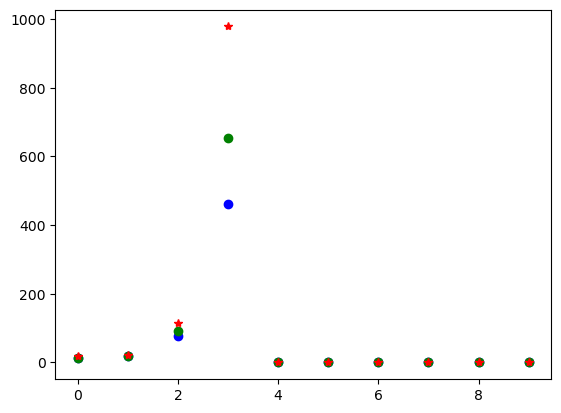

In [7]:
# show the mean feature vectors using matplotlib 
from matplotlib import pyplot as plt

#show the mean feature vector of benign samples using blue dots
#plt.plot
plt.plot(benign_mean, 'bo')
plt.plot(total_mean, 'go')

#show the mean feature vector of malignant samples using read star
plt.plot(malignant_mean, 'r*')
plt.show()


### Task 2: Data search. 10 points.  <a id = "section2"/>

Let the user input a sample index (0 to 568), and your code will output the feature vector and the corresponding class label of that sample.

    - Extra 5 points for dealing with abnormal input
    - 5 extra points for enabling multiple searches in one run


In [8]:
# tip: use the input() function
print('This program will let you enter an index of the sample you want to check from 0 to 568: ')
while(input('Do you want to continue? (y/n)') == 'y'):
    index = int(input('Please enter the index of the sample you want to check from 0 to 568: '))
    if(index < 0 or index > 568):
        print('Invalid index! Please enter again!')
        continue
    else:
        print('The feature vector of sample', index, 'is: ', ftrs[index])
        if tgts[index] == 0:
            print('The sample is malignant')
        else:
            print('The sample is benign')


This program will let you enter an index of the sample you want to check from 0 to 568: 


### Task 3.  Study the 'area' feature. 30 points  <a id = "section3"/>
 - Task 3.1: Calculate and print out the mean, min and max values 
 - Task 3.2: Calculate and print out the mean, min and max values 
 - What observations can you get from the results of Tasks 3.1 and 3.2?

The mean of the area (index 3) for all benign samples is: 462.7901960784313
The min of the area (index 3) for all benign samples is: 143.5
The max of the area (index 3) for all benign samples is: 992.1


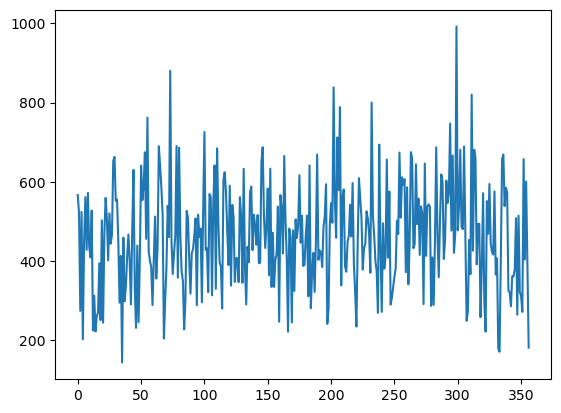

In [9]:
#Task 3.1: Calculate and print out the mean, min and max values 
# of the feature 'area (index 3)' for all benign samples.
print(f'The mean of the area (index 3) for all benign samples is: {np.mean(benign_ftrs[:,3])}')
print(f'The min of the area (index 3) for all benign samples is: {np.min(benign_ftrs[:,3])}')
print(f'The max of the area (index 3) for all benign samples is: {np.max(benign_ftrs[:,3])}')

# plot the area features of all benign samples
plt.plot(benign_ftrs[:,3])
plt.show()

The mean of the area (index 3) for all malignant samples is: 978.3764150943397
The min of the area (index 3) for all malignant samples is: 361.6
The max of the area (index 3) for all malignant samples is: 2501.0


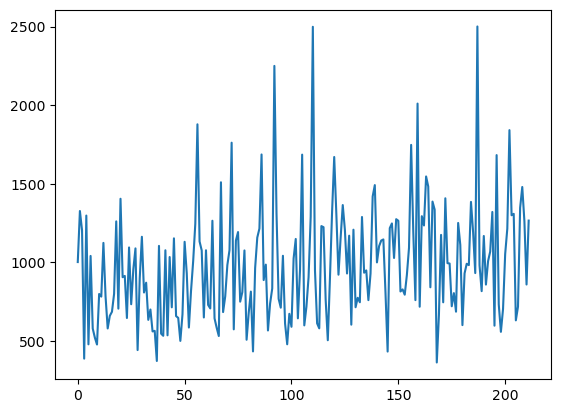

In [10]:
#Task 3.2: Calculate and print out the mean, min and max values 
# of the feature 'area (index 3)' for all malignant samples.
print(f'The mean of the area (index 3) for all malignant samples is: {np.mean(malignant_ftrs[:,3])}')
print(f'The min of the area (index 3) for all malignant samples is: {np.min(malignant_ftrs[:,3])}')
print(f'The max of the area (index 3) for all malignant samples is: {np.max(malignant_ftrs[:,3])}')



# plot the area features of all malignant samples
plt.plot(malignant_ftrs[:,3])
plt.show()

#### Task 3.3: What observations can you get from the results of Tasks 3.1 and 3.2?

Response: The main observation that I am pulling from this data, is that the Malignant samples mean, min, and max areas of the samples are much larger than the begnign samples areas. This would possibly lead to easier detection by machine learning algorithms if the sizes of the Malignant samples are all consistently bigger than the begnign ones. 





### Task 4: Count data samples. 10 points  <a id = "section4"/>



In [11]:
# Task 4.1 Count the number of malignant samples that have 'area (index 3)' values less than 600. 10 points
count = 0
for i in malignant_ftrs[:,3]:
    if i < 600:
        count += 1
print(count)

31


In [12]:
# Task 4.2 Count the number of benign samples that have 'area (index 3)' values less than 600. 10 points
count = 0
for i in benign_ftrs[:,3]:
    if i < 600:
        count += 1
print(count)

304


### Task 5. 20 points <a id = "section5"/>

Define a function that calculates and return the Euclidean distance between any two given data samples
 

In [14]:
import math
# Task 5.1 impliment the Eclidean function
def Eclidean(a, b):
    '''
        inputs:a, b: feature vectors of two patients
        return: d: the distance
    '''
    return math.sqrt(sum((a-b)**2))
  
# test
print('two malignant samples:', Eclidean(ftrs[1], ftrs[2])) # two maliganant samples
print('two benign samples:', Eclidean(ftrs[19], ftrs[20])) # two benign samples
print('between two mean vectors:', Eclidean(benign_mean, malignant_mean)) # betwwen means

two malignant samples: 123.08662898837753
two benign samples: 46.35812850705252
between two mean vectors: 516.9734937120692


In [ ]:
# Task 5.2 calculate and print out the Eclidean distance between each feature vector
# and the mean feature vector of maliganant samples
